# Prepcourse Capstone
## Global Agriculture Statistics
#### Arun Nair

The goal of this capstone is to:
1. look at the agricultural production of 200 countries in the world, and then compare the top 5 crop producing nations.
2. compare the bottom 5 crop producing nations.
3. perform a t-test from sample of top 5 vs. bottom 5.

## Description of the FAO Dataset

A detailed description of the columns in the Food and Agricultural Organization of the United Nations dataset can be found here:

[FAO Definitions](http://www.fao.org/faostat/en/#definitions
)


Main Characteristics of the Data can be found with following link:

[Metadata](http://www.fao.org/faostat/en/#data/QC/metadata
)

A further, and more interactive source can be found [here](http://www.fao.org/faostat/en/#data/QC/visualize).


The data has been collected throught the years 1961 to 2007.


#### Libraries
We begin by installing the necessary libraries shown below

In [8]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cbook as cbook
import seaborn as sns
%matplotlib inline

### Other Terms and Values

1. Value: expressed in ["International Dollars"](https://en.wikipedia.org/wiki/Geary–Khamis_dollar), a unit representing the value of the US dollar at a given point of time. 

2. PIN: [Production Index Number](http://www.fao.org/waicent/faostat/agricult/pinelint-e.htm)

In [9]:
df= pd.read_csv("fao_data_production_indices_data.csv", low_memory=False)
df

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,2486910.0,A,agriculture_pin
1,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,2278516.0,A,agriculture_pin
2,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,2524097.0,A,agriculture_pin
3,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,2226346.0,A,agriculture_pin
4,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,2289434.0,A,agriculture_pin
5,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2002.0,1000 Int. $,2216530.0,A,agriculture_pin
6,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2001.0,1000 Int. $,1863022.0,A,agriculture_pin
7,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2000.0,1000 Int. $,1935142.0,A,agriculture_pin
8,Afghanistan,152,Gross Production 1999-2001 (1000 I$),1999.0,1000 Int. $,2345362.0,A,agriculture_pin
9,Afghanistan,152,Gross Production 1999-2001 (1000 I$),1998.0,1000 Int. $,2373424.0,A,agriculture_pin


### Data Cleaning

For the purpose of this capstone, we will only be looking at the following values:
1. Country
2. Year
3. Value

This is done so that we can get a idea of the how much production has been yielded by the countries in case, over a span of set years.

we can clean the data by filtering out the columns that contains values or strings that are currently not needed.


In [10]:
del df['element_code']
del df['value_footnotes']
del df['unit']
df.head()


,country_or_area,element,year,value,category
0,Afghanistan,Gross Production 1999-2001 (1000 I$),2007.0,2486910.0,agriculture_pin
1,Afghanistan,Gross Production 1999-2001 (1000 I$),2006.0,2278516.0,agriculture_pin
2,Afghanistan,Gross Production 1999-2001 (1000 I$),2005.0,2524097.0,agriculture_pin
3,Afghanistan,Gross Production 1999-2001 (1000 I$),2004.0,2226346.0,agriculture_pin
4,Afghanistan,Gross Production 1999-2001 (1000 I$),2003.0,2289434.0,agriculture_pin


The category column refers to the Production Index Numbers of a particular category. (E.g. agriculture, non food, livestock). All these fall under the agricultural banner, and are hence quite redundant. However, we can still find the different unique categories available, in order to better understand where these **"PINs"** come from.

Before doing describe, we should drop the aggregates (+)

In [11]:
df['category'].unique()

array(['agriculture_pin', 'crops_pin', 'food_pin', 'livestock_pin',
       'non_food_pin'], dtype=object)

Let us change the column headers for better simplicity and understanding.

In [12]:
headers = ["Country", "Production", "Year", "Value", "Category"]
df.columns = headers
df.head()

,Country,Production,Year,Value,Category
0,Afghanistan,Gross Production 1999-2001 (1000 I$),2007.0,2486910.0,agriculture_pin
1,Afghanistan,Gross Production 1999-2001 (1000 I$),2006.0,2278516.0,agriculture_pin
2,Afghanistan,Gross Production 1999-2001 (1000 I$),2005.0,2524097.0,agriculture_pin
3,Afghanistan,Gross Production 1999-2001 (1000 I$),2004.0,2226346.0,agriculture_pin
4,Afghanistan,Gross Production 1999-2001 (1000 I$),2003.0,2289434.0,agriculture_pin


In [13]:
df.shape

(311634, 5)

In [14]:
df.dropna(inplace=True)
df.shape

(311624, 5)

In [15]:
df.dtypes
#Change dtypes

Country        object
Production     object
Year          float64
Value         float64
Category       object
dtype: object

In [16]:
df[["Value", "Year"]] = df[["Value", "Year"]].astype("int")
df[["Year"]]=df[["Year"]].astype("object")
df.dtypes


#Ask Antonio why year is defined twice

#Antonio is guessing that's due to plotting (he wants to check it)

Country       object
Production    object
Year          object
Value          int32
Category      object
dtype: object

In [17]:
Country= df.groupby('Country').sum()
Country.sort_values

<bound method DataFrame.sort_values of                                           Value
Country                                        
Afghanistan                        5.137305e+08
Africa +                           2.113607e+10
Albania                            1.494898e+08
Algeria                            6.302403e+08
American Samoa                     6.042080e+05
Americas +                         7.127633e+10
Angola                             2.221367e+08
Antigua and Barbuda                1.443409e+06
Argentina                          5.393473e+09
Armenia                            5.125982e+07
Asia +                             1.180869e+11
Australia                          3.732254e+09
Australia and New Zealand +        5.300220e+09
Austria                            8.952169e+08
Azerbaijan                         1.304907e+08
Bahamas                            3.921381e+06
Bahrain                            4.454597e+06
Bangladesh                         2.325624e+09
B

In [18]:
df.replace({'Gross Production 1999-2001 (1000 I$)':'Gross Production'}, inplace=True)
df.head()

,Country,Production,Year,Value,Category
0,Afghanistan,Gross Production,2007,2486910,agriculture_pin
1,Afghanistan,Gross Production,2006,2278516,agriculture_pin
2,Afghanistan,Gross Production,2005,2524097,agriculture_pin
3,Afghanistan,Gross Production,2004,2226346,agriculture_pin
4,Afghanistan,Gross Production,2003,2289434,agriculture_pin


In [19]:
df.replace({'Net Production 1999-2001 (1000 I$)' : 'Net Production',
            'Gross PIN (base 1999-2001)' : 'Gross PIN',
            'Grs per capita PIN (base 1999-2001)':'Gross Per Capita PIN', 
            'Net PIN (base 1999-2001)':'Net PIN', 
            'Net per capita PIN (base 1999-2001)':'Net Per Capita PIN',
           'Russian Federation' : 'Russia'}, inplace=True)

In [20]:
list(df)

['Country', 'Production', 'Year', 'Value', 'Category']

In [21]:
df.Category.unique()

array(['agriculture_pin', 'crops_pin', 'food_pin', 'livestock_pin',
       'non_food_pin'], dtype=object)

In [22]:
df.head()

,Country,Production,Year,Value,Category
0,Afghanistan,Gross Production,2007,2486910,agriculture_pin
1,Afghanistan,Gross Production,2006,2278516,agriculture_pin
2,Afghanistan,Gross Production,2005,2524097,agriculture_pin
3,Afghanistan,Gross Production,2004,2226346,agriculture_pin
4,Afghanistan,Gross Production,2003,2289434,agriculture_pin


In [23]:
df1 = df.drop(df[df['Production'] != 'Gross Production'].index)
df2 = df1.drop(df1[df1['Category'] != 'agriculture_pin'].index)
df2.tail()

,Country,Production,Year,Value,Category
63856,Zimbabwe,Gross Production,1965,687546,agriculture_pin
63857,Zimbabwe,Gross Production,1964,740738,agriculture_pin
63858,Zimbabwe,Gross Production,1963,625430,agriculture_pin
63859,Zimbabwe,Gross Production,1962,679806,agriculture_pin
63860,Zimbabwe,Gross Production,1961,640644,agriculture_pin


In [24]:
gross_prod = df2[['Country', 'Year', 'Value']]
gross_prod.head()

,Country,Year,Value
0,Afghanistan,2007,2486910
1,Afghanistan,2006,2278516
2,Afghanistan,2005,2524097
3,Afghanistan,2004,2226346
4,Afghanistan,2003,2289434


In [25]:
#No need to pivot. Edit from here.
#Groupby (Country,year?)

In [26]:

gross_prod2 = gross_prod.pivot(index='Country', columns='Year', values='Value')
gross_prod2.head()

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1365296.0,1393857.0,1399596.0,1489104.0,1550441.0,1575538.0,1717742.0,1790886.0,1829964.0,1658073.0,...,2373424.0,2345362.0,1935142.0,1863022.0,2216530.0,2289434.0,2226346.0,2524097.0,2278516.0,2486910.0
Africa +,40235510.0,42469530.0,44027500.0,44810030.0,45741720.0,45589030.0,48631010.0,49961520.0,52174760.0,54258640.0,...,105472200.0,109259900.0,110363900.0,113037800.0,116928400.0,122382000.0,126063000.0,130236700.0,135449900.0,130351100.0
Albania,254771.0,274898.0,274310.0,301150.0,291325.0,329062.0,343560.0,343240.0,351221.0,366693.0,...,706612.0,700072.0,733849.0,747971.0,755188.0,789269.0,819870.0,813707.0,858366.0,824818.0
Algeria,1639496.0,1738226.0,1742950.0,1551149.0,1793427.0,1209707.0,1345804.0,1729201.0,1601248.0,1658379.0,...,3033235.0,3107780.0,2941046.0,3215132.0,3269373.0,3863700.0,4211766.0,4221735.0,4404404.0,4225072.0
American Samoa,1750.0,1785.0,2000.0,2005.0,2057.0,2104.0,1941.0,1875.0,1921.0,1850.0,...,2221.0,1781.0,1872.0,2054.0,2126.0,2469.0,2365.0,2365.0,2403.0,2415.0


In [27]:
gross_prod2.columns = gross_prod2.columns.astype(str)
years = list(map(str, range(1961, 2008)))
gap = gross_prod2
gap['Total'] = gap.sum(axis=1)
gap.sort_values(['Total'], ascending=False, axis=0, inplace=True)
gap = gap[years].transpose()
gap.fillna(0, inplace=True)
gap.head()

Country,World +,Asia +,Europe +,Americas +,Eastern Asia +,European Union +,China,Northern America +,Southern Asia +,United States of America,...,Faroe Islands,Niue,Marshall Islands,Greenland,British Virgin Islands,Tuvalu,Nauru,Tokelau,Cayman Islands,Saint Pierre and Miquelon
Year,,,,,,,,,,,,,,,,,,,,,
1961,607542000.0,179038900.0,224694200.0,151225800.0,73769500.0,136224300.0,58340740.0,98065620.0,68169040.0,89816580.0,...,251.0,498.0,0.0,430.0,717.0,473.0,184.0,170.0,0.0,0.0
1962,627390800.0,184564800.0,231333600.0,155494300.0,76666790.0,141587400.0,60690860.0,100191400.0,68317880.0,90275010.0,...,239.0,571.0,0.0,513.0,708.0,474.0,184.0,220.0,0.0,0.0
1963,642877400.0,191333500.0,231958200.0,161601700.0,80440290.0,144877100.0,63942700.0,104454200.0,70574070.0,93700380.0,...,269.0,719.0,0.0,458.0,598.0,476.0,185.0,112.0,0.0,0.0
1964,666254900.0,199301800.0,244458600.0,162971000.0,85929400.0,146292400.0,68462610.0,104573900.0,71804500.0,94323650.0,...,221.0,856.0,0.0,665.0,403.0,513.0,191.0,281.0,0.0,0.0
1965,678915200.0,203996300.0,244380200.0,170410400.0,92461040.0,147757200.0,74747900.0,108850500.0,69926900.0,97704050.0,...,207.0,760.0,0.0,548.0,409.0,514.0,212.0,256.0,0.0,0.0


We have alot of **"+"** fields within the dataset. These represent the aggregate values of countries/regions (e.g. Asia, Europe etc). This would prove to result in making errors with our testing, as both the countries **AND** the aggregates will be included in the calculations. Hence, we will be dropping these values from our dataframe.

In [28]:
gap_unwant = [col for col in gap.columns if '+' in col]
gap = gap.drop(gap_unwant, axis=1)
gap.head()



Country,China,United States of America,India,USSR,Brazil,France,Germany,Italy,Argentina,Indonesia,...,Faroe Islands,Niue,Marshall Islands,Greenland,British Virgin Islands,Tuvalu,Nauru,Tokelau,Cayman Islands,Saint Pierre and Miquelon
Year,,,,,,,,,,,,,,,,,,,,,
1961,58340740.0,89816580.0,50142680.0,72768810.0,16564600.0,23408500.0,22077690.0,18638310.0,11950390.0,7383684.0,...,251.0,498.0,0.0,430.0,717.0,473.0,184.0,170.0,0.0,0.0
1962,60690860.0,90275010.0,50015760.0,73961920.0,17344940.0,26654000.0,24241470.0,19289340.0,12519320.0,8054871.0,...,239.0,571.0,0.0,513.0,708.0,474.0,184.0,220.0,0.0,0.0
1963,63942700.0,93700380.0,51367730.0,70531000.0,17443010.0,25202710.0,25340780.0,18918070.0,13694660.0,7650931.0,...,269.0,719.0,0.0,458.0,598.0,476.0,185.0,112.0,0.0,0.0
1964,68462610.0,94323650.0,52267720.0,81216890.0,17658130.0,25321080.0,24843610.0,19893760.0,12918230.0,8076970.0,...,221.0,856.0,0.0,665.0,403.0,513.0,191.0,281.0,0.0,0.0
1965,74747900.0,97704050.0,49498330.0,80941960.0,20367240.0,26780910.0,23988490.0,20564500.0,12247380.0,7925503.0,...,207.0,760.0,0.0,548.0,409.0,514.0,212.0,256.0,0.0,0.0


These aggregates represent the values of the PIN (Production Index Number) of the different countries.


# Comparison of countries which lead crop production
# (we'll compare the the production of the top 5 countries vs the bottom 5)

We will be comparing the top five countries, along with the bottom 5. We will do this to see trends such as:
+ Yield through the years.
+ Which country has been leading.
+ Which country has the lowest.


## Top 5 Countries

In [122]:
gap_top5 = gap.transpose()
gap_top5 = gap_top5.head(5)
gap_top5tran = gap_top5.transpose()
gap_top5tran


Country,China,United States of America,India,USSR,Brazil
Year,,,,,
1961,58340740.0,89816580.0,50142680.0,72768810.0,16564600.0
1962,60690860.0,90275010.0,50015760.0,73961920.0,17344940.0
1963,63942700.0,93700380.0,51367730.0,70531000.0,17443010.0
1964,68462610.0,94323650.0,52267720.0,81216890.0,17658130.0
1965,74747900.0,97704050.0,49498330.0,80941960.0,20367240.0
1966,80445930.0,97277180.0,49309560.0,90781310.0,19238750.0
1967,81718660.0,101177900.0,52731470.0,92659220.0,20650260.0
1968,81474800.0,103420600.0,55208160.0,98507460.0,21256810.0
1969,82195340.0,104285200.0,56970870.0,93745540.0,22008700.0


From the above table, we concur that the top five countries are BRIC (Brazil, Russia( it is actually USSR), India, China) and the United States.

The [USSR](https://history.state.gov/milestones/1989-1992/collapse-soviet-union) disbanded in 1991.




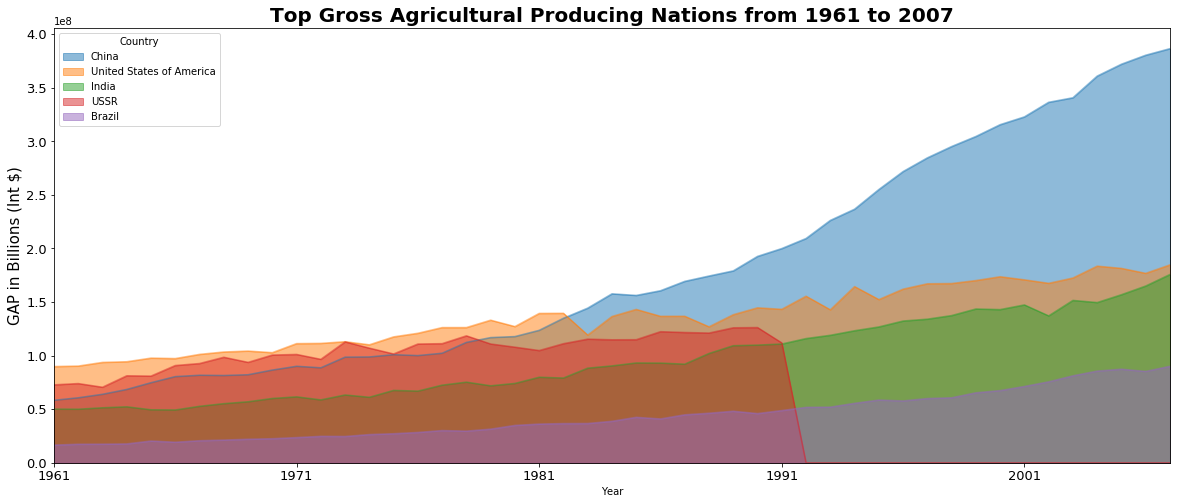

In [123]:
gap_top5tran.fillna(0, inplace=True)
ax = gap_top5tran.plot(kind='area', figsize=(20,8), stacked=False)
ax.set_title('Top Gross Agricultural Producing Nations from 1961 to 2007', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax.set_xlabel('Year')
ax.tick_params(labelsize=13)

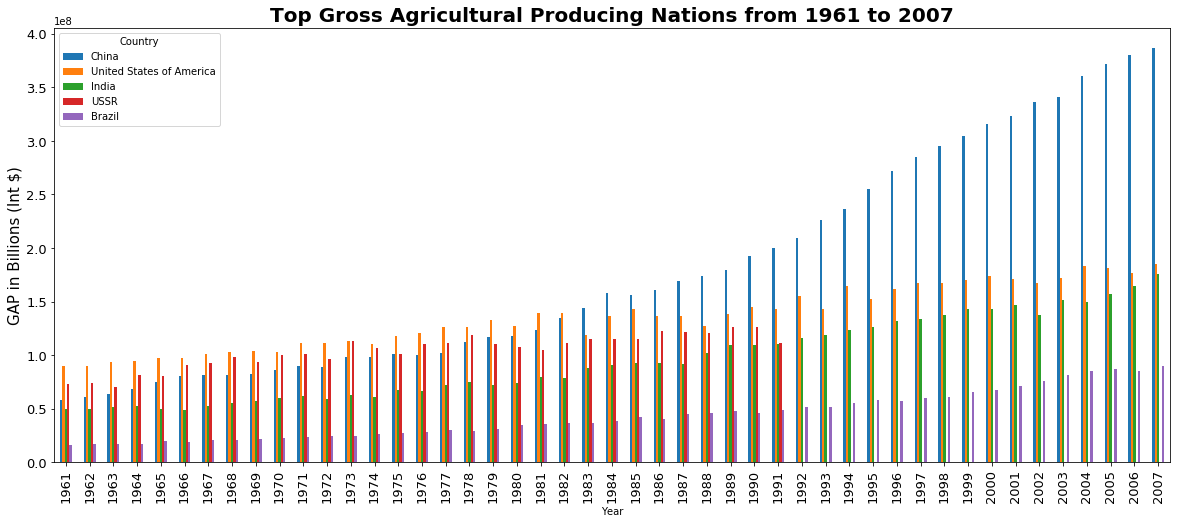

In [67]:
gap_top5tran.fillna(0, inplace=True)
ax = gap_top5tran.plot(kind='bar', figsize=(20,8), stacked=False)
ax.set_title('Top Gross Agricultural Producing Nations from 1961 to 2007', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax.set_xlabel('Year')
ax.tick_params(labelsize=13)

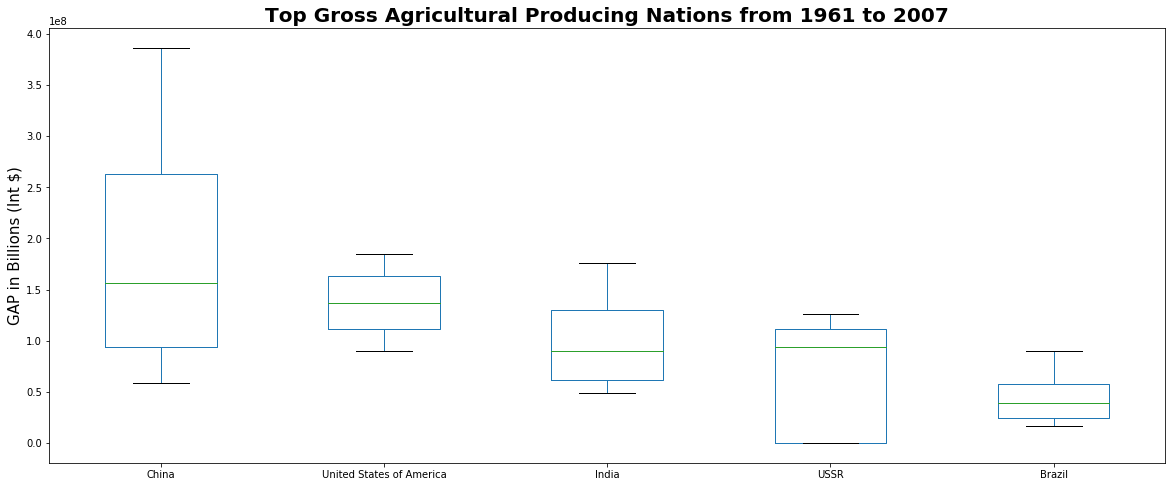

In [68]:
ax0 = gap_top5tran.plot(kind='box', figsize=(20,8))
ax0.set_title('Top Gross Agricultural Producing Nations from 1961 to 2007', fontsize=20, fontweight='bold')
ax0.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax0.tick_params(labelsize=10)

## Bottom 5 Countries

In [80]:
gap_bottom5 = gap.transpose()
gap_bottom5 = gap_bottom5.tail(5)
gap_bottom5tran = gap_bottom5.transpose()
gap_bottom5tran

Country,Tuvalu,Nauru,Tokelau,Cayman Islands,Saint Pierre and Miquelon
Year,,,,,
1961,473.0,184.0,170.0,0.0,0.0
1962,474.0,184.0,220.0,0.0,0.0
1963,476.0,185.0,112.0,0.0,0.0
1964,513.0,191.0,281.0,0.0,0.0
1965,514.0,212.0,256.0,0.0,0.0
1966,515.0,213.0,205.0,200.0,0.0
1967,467.0,218.0,184.0,202.0,0.0
1968,438.0,219.0,198.0,202.0,0.0
1969,400.0,233.0,198.0,206.0,0.0


Our bottom 5 countries are Tuvalu, Nauru, Tokelau, Cayman Islands,and Saint Pierre and Miquelon.

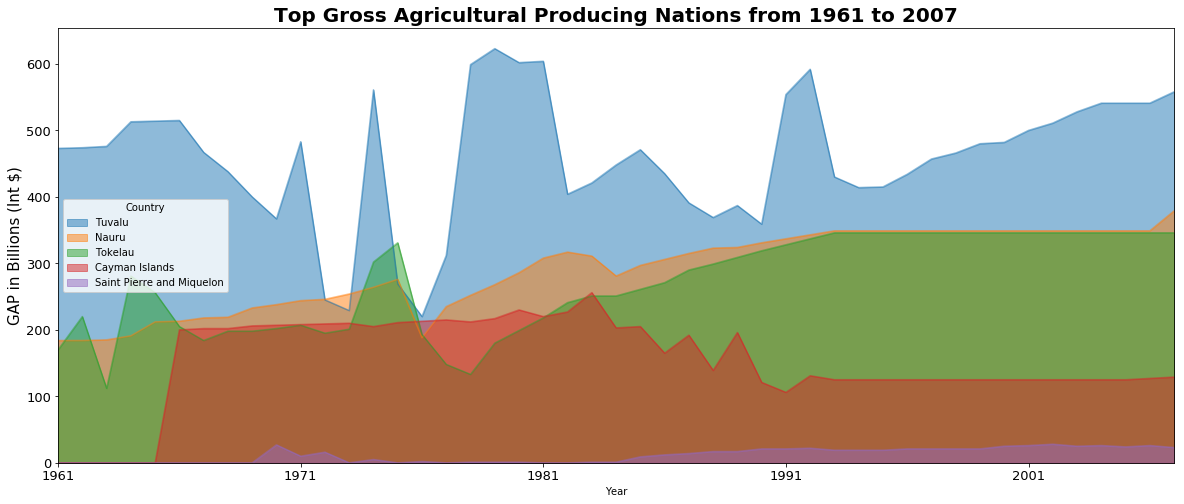

In [81]:
gap_bottom5tran.fillna(0, inplace=True)
ax = gap_bottom5tran.plot(kind='area', figsize=(20,8), stacked=False)
ax.set_title('Top Gross Agricultural Producing Nations from 1961 to 2007', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax.set_xlabel('Year')
ax.tick_params(labelsize=13)

This plot shows us how inconsistent the production in the bottom 5 countries have been. 

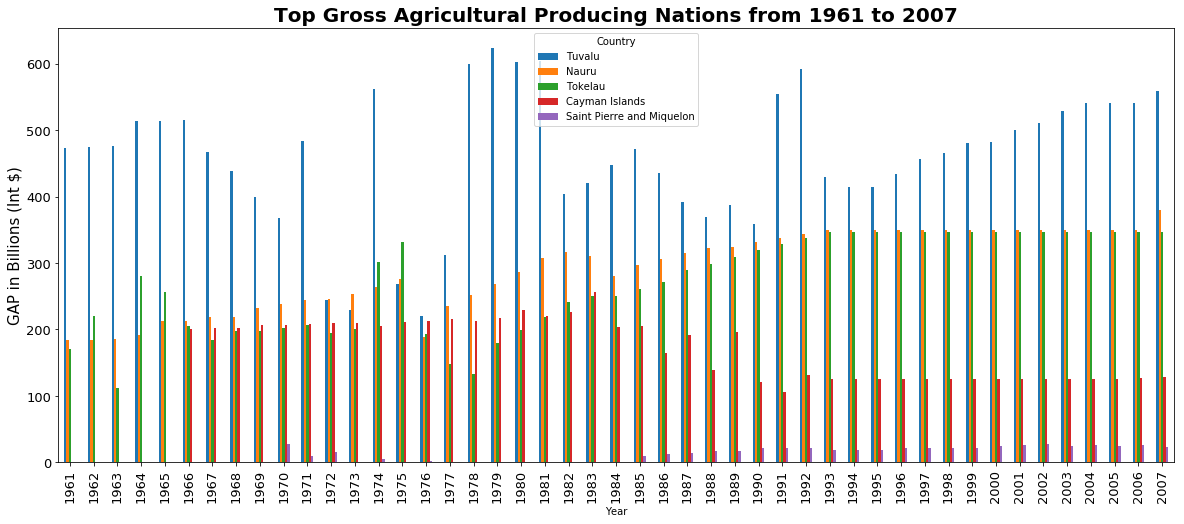

In [82]:
gap_bottom5tran.fillna(0, inplace=True)
ax = gap_bottom5tran.plot(kind='bar', figsize=(20,8), stacked=False)
ax.set_title('Top Gross Agricultural Producing Nations from 1961 to 2007', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax.set_xlabel('Year')
ax.tick_params(labelsize=13)

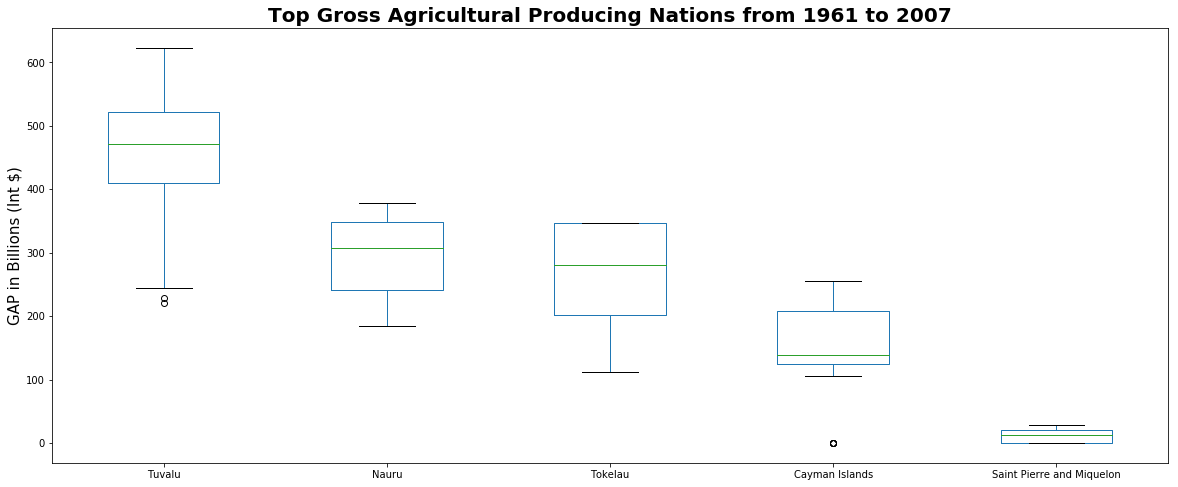

In [83]:
ax0 = gap_bottom5tran.plot(kind='box', figsize=(20,8))
ax0.set_title('Top Gross Agricultural Producing Nations from 1961 to 2007', fontsize=20, fontweight='bold')
ax0.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax0.tick_params(labelsize=10)

# Random Sampling of Top 5 and Bottom 5 Countries

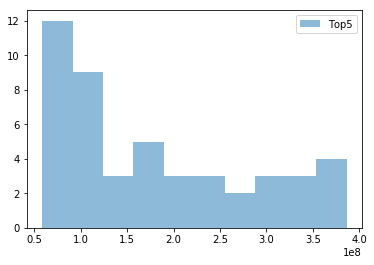

In [84]:
plt.hist(gap_top5tran.China, alpha=0.5, label='Top5') 
plt.legend(loc='upper right')
plt.show()

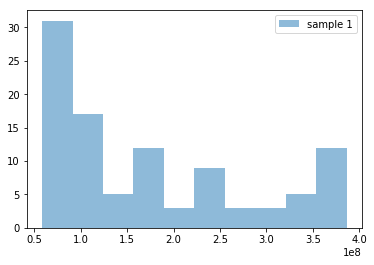

In [85]:
sample1 = np.random.choice(gap_top5tran.China, 100, replace=True)
plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.legend(loc='upper right') 
plt.show()

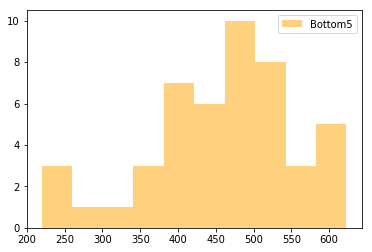

In [86]:
plt.hist(gap_bottom5tran.Tuvalu, alpha=0.5, label='Bottom5', color='orange') 
plt.legend(loc='upper right')
plt.show()

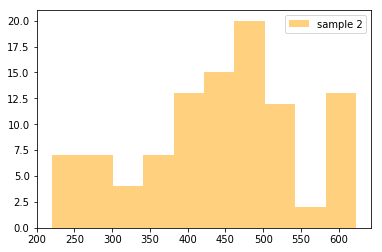

In [87]:
sample2 = np.random.choice(gap_bottom5tran.Tuvalu, 100, replace=True)
plt.hist(sample2, alpha=0.5, label='sample 2', color="orange") 
plt.legend(loc='upper right') 
plt.show()

## t-test 
Now, running the t-test:

In [88]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=-16.62241315870833, pvalue=2.0889821040827813e-30)


We see that t-statistic and p-value are small, meaning there is not much variability. However, being skewed, the tests should be revised.

# Conclusion

The purpose of this capstone was to evaulate the agricultural trends of the top 5 and bottom 5 countries found in the FAO dataset. The objective was to evaluate the production through time, and see if these countries continued to lead in time. A note should be made about USSR, as it is itself an aggregrate of 15 countries! However, Russia covered over 75% of this area (Russia=17.1 million km^2  USSR= 22.4^2)

In [103]:
ax0 = G5.USSR.plot(kind='box', figsize=(20,8))
ax0.set_title('Top Gross Agricultural Producing Nations from 1961 to 2007', fontsize=20, fontweight='bold')
ax0.set_ylabel('GAP in Billions (Int $)', fontsize=15)
ax0.tick_params(labelsize=10)

AttributeError: 'DataFrame' object has no attribute 'USSR'